In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("train.csv")

In [6]:
test = pd.read_csv("test.csv")

In [7]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [10]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [11]:
meal_info = pd.read_csv("meal_info.csv")

In [12]:
center_info = pd.read_csv("fulfilment_center_info.csv")

In [13]:
trainfinal = pd.merge(train,meal_info, on="meal_id", how="outer")

In [14]:
trainfinal = pd.merge(trainfinal,center_info,on="center_id",how="outer")

In [15]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [16]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)

In [17]:
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [18]:
cols = trainfinal.columns.tolist()

In [19]:
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [20]:
cols = cols[:2]+cols[9:]+cols[7:9]+cols[2:7]

In [21]:
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [22]:
trainfinal = trainfinal[cols]

In [23]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [24]:
import sklearn
sklearn.__version__

'0.21.2'

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb1 = LabelEncoder()

In [27]:
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

In [28]:
lb2 = LabelEncoder()

In [29]:
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

In [30]:
lb3 = LabelEncoder()

In [31]:
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [32]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [33]:
trainfinal.shape

(456548, 13)

In [34]:
plt.style.use('fivethirtyeight')

In [35]:
plt.figure(figsize=(12,7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'num_orders Distribution')

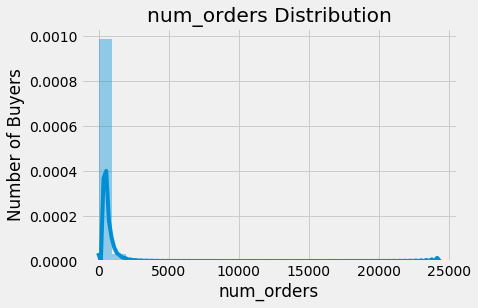

In [36]:
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [37]:
trainfinal2 = trainfinal.drop(['id'], axis=1)

In [38]:
correlation = trainfinal2.corr(method='pearson')

In [39]:
columns = correlation.nlargest(8, 'num_orders').index 

In [40]:
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

In [41]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)

In [42]:
sns.set(font_scale=1.0)

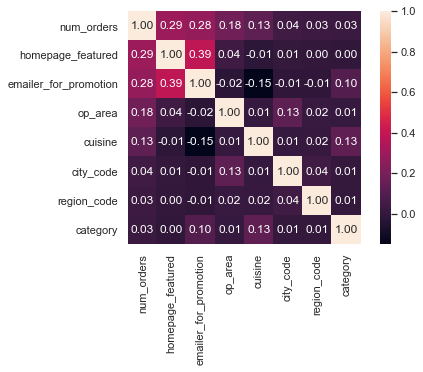

In [43]:
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [44]:
features = columns.drop(['num_orders'])

In [45]:
trainfinal3 = trainfinal[features]

In [46]:
X = trainfinal3.values

In [47]:
y= trainfinal['num_orders'].values

In [48]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.linear_model import Lasso

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor 

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBRegressor

In [56]:
XG = XGBRegressor()

XG.fit(X_train, y_train) 

y_pred= XG.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 69.36006665968127


In [57]:
LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.04037821970292


In [58]:
L = Lasso()

L.fit(X_train, y_train)

y_pred = L.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 128.63116021054245


In [59]:
EN = ElasticNet()

EN.fit(X_train, y_train)

y_pred = EN.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.80144674424753


In [60]:
DT = DecisionTreeRegressor()

DT. fit(X_train, y_train)

y_pred = DT.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.969235606700316


In [61]:
KNN = KNeighborsRegressor()

KNN.fit(X_train, y_train) 

y_pred = KNN.predict(X_val) 

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.54741634655392


In [62]:
GB = GradientBoostingRegressor()

GB.fit(X_train, y_train)

y_pred = GB.predict(X_val)

y_pred[y_pred<0] = 0

from sklearn import metrics

print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 100.64908703719439


In [68]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

In [69]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer") 

testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer") 

testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()

tcols = tcols[:2] + tcols [8:] + tcols[6:8] + tcols[2:6]

testfinal= testfinal[tcols]


lb1 = LabelEncoder()

testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])


lb2 = LabelEncoder()

testfinal['category'] = lb1.fit_transform(testfinal['category'])


lb3 = LabelEncoder()

testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

In [70]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

In [71]:
submit.to_csv("submission.csv", index=False)

In [72]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.826491
std,1.441580e+05,364.652002
min,1.000085e+06,15.363636
25%,1.123969e+06,64.667910
50%,1.247296e+06,150.223642
75%,1.372971e+06,319.032520
max,1.499996e+06,6066.050000
